Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Platform: Windows-10-10.0.26100-SP0
Environment path: c:\Users\Matthew\anaconda3


c:\Users\Matthew\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


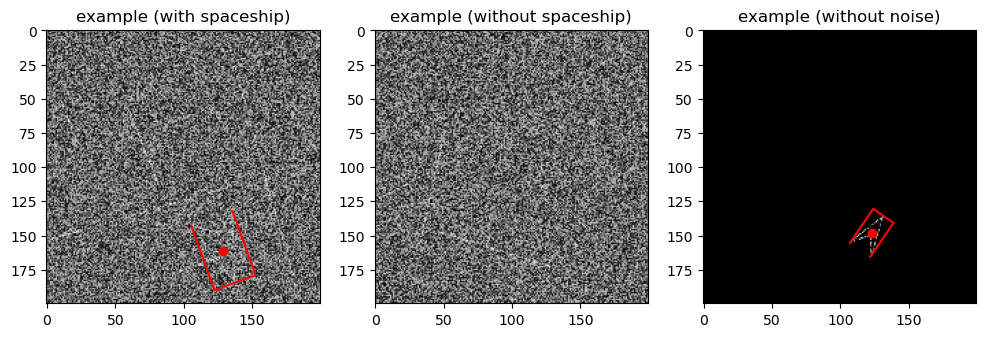

In [1]:
import sys
import platform
import matplotlib.pyplot as plt
import torch
import cv2

print("Python version:", sys.version)
print("Platform:", platform.platform())
print("Environment path:", sys.prefix)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(0)

from helpers import make_data, _make_box_pts
import matplotlib.pyplot as plt
import numpy as np
from skimage.draw import line


fig, ax = plt.subplots(1, 3, figsize=(12, 4))


def plot(ax, img, label, title):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)

    if label.size > 0:
        x, y, _, _, _ = label
        ax.scatter(x, y, c="r")

        xy = _make_box_pts(*label)
        ax.plot(xy[:, 0], xy[:, 1], c="r")
        
def plot_truth_pred(ax, img, truth, pred, title):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)

    if label.size > 0:
        x, y, _, _, _ = truth
        ax.scatter(x, y, c="g")
        xy = _make_box_pts(*truth)
        ax.plot(xy[:, 0], xy[:, 1], c="g")

        x, y, _, _, _ = pred
        ax.scatter(x, y, c="r")
        xy = _make_box_pts(*pred)
        ax.plot(xy[:, 0], xy[:, 1], c="r")


img, label = make_data(has_spaceship=True)
plot(ax[0], img, label, "example (with spaceship)")

img, label = make_data(has_spaceship=False)
plot(ax[1], img, label, "example (without spaceship)")


img, label = make_data(has_spaceship=True, no_lines=0, noise_level=0)
plot(ax[2], img, label, "example (without noise)")



In [55]:
import numpy as np
import torch
import torch.nn.functional as F
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

def preprocess_image(img, type, kernel):
    # Normalize the image to the range [0, 1]
    # img = img / 255.0
    
    # Apply Gaussian blur to reduce noise

    
    img = cv2.GaussianBlur(img, (kernel,kernel), 0)
    
    img = cv2.medianBlur(img, kernel_size)
    
    return img


def convolve(image, filter, title=''):
    """
    This function performs convolution and
    returns both the original and convolved
    images.
		"""
	
    #  reading image in grayscale format

    #  defining filter size
    filter_size = filter.shape[0]

    #  creating an array to store convolutions (x-m+1, y-n+1)
    convolved = np.zeros(((image.shape[0] - filter_size) + 1, 
                      (image.shape[1] - filter_size) + 1))
    
    #  performing convolution
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        try:
          convolved[i,j] = (image[i:(i+filter_size),
                                  j:(j+filter_size)] * filter).sum()
        except Exception:
          pass

    #  converting to tensor
    convolved = torch.tensor(convolved)
    #  applying relu activation
    # convolved = F.relu(convolved)

    #  producing plots
    figure, axes = plt.subplots(1,2, dpi=120)
    plt.suptitle(title)
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('original')
    axes[1].imshow(convolved, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('convolved')
    pass

In [56]:
prewitt_horizontal = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
prewitt_vertical = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [61]:
def apply_prewitt_filter(img):
    # Define the Prewitt kernels
    prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    
    # Apply the Prewitt kernels
    grad_x = cv2.filter2D(img, -1, prewitt_kernel_x)
    grad_y = cv2.filter2D(img, -1, prewitt_kernel_y)
    
    # Compute the magnitude of the gradients
    grad = np.sqrt(grad_x**2 + grad_y**2)
    
    return grad

In [87]:
img

array([[0.02324966, 0.22593011, 0.20428529, ..., 0.30436663, 0.41088006,
        0.22183692],
       [0.45962647, 0.13469167, 0.79356281, ..., 0.41340514, 0.1135378 ,
        0.45213766],
       [0.16743895, 0.53101847, 0.62743918, ..., 0.21415622, 0.39779062,
        0.19367472],
       ...,
       [0.67099719, 0.31519009, 0.02302414, ..., 0.59353865, 0.33160099,
        0.23533251],
       [0.36726146, 0.28937386, 0.75738829, ..., 0.60726142, 0.51349289,
        0.11186644],
       [0.49008641, 0.54255259, 0.38821181, ..., 0.62740261, 0.70756938,
        0.62996415]])

In [95]:
low_threshold = 50  # Lower bound for the hysteresis thresholding
high_threshold = 150  # Upper bound for the hysteresis thresholding
edges = cv2.Canny((img*255).astype(np.uint8), low_threshold, high_threshold)

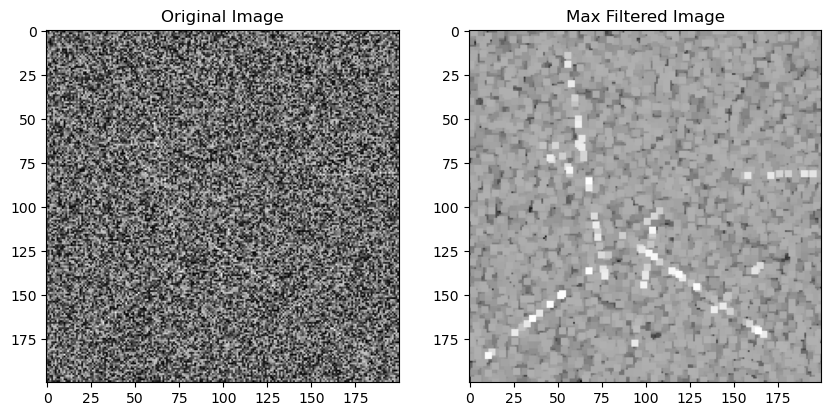

In [126]:
from scipy.ndimage import maximum_filter
img, label = make_data(has_spaceship=True, noise_level = 0.8)
# img =  cv2.medianBlur(img.astype(np.float32), 3)
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(maximum_filter(img, size=4), cmap='gray'), plt.title('Max Filtered Image')
plt.show()

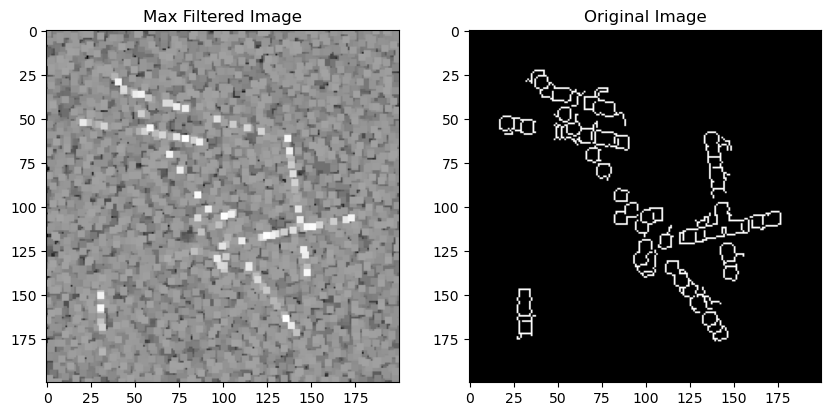

In [159]:
from scipy.ndimage import maximum_filter
# img, label = make_data(has_spaceship=True, noise_level = 0.8)
low_threshold = 30
high_threshold = 250
plt.figure(figsize=(10, 6))
maex = maximum_filter(img, size=4)
plt.subplot(121), plt.imshow(maxed, cmap='gray'), plt.title('Max Filtered Image')
plt.subplot(122), plt.imshow(cv2.Canny((maximum_filter(maxed, size=4)*255).astype(np.uint8), low_threshold, high_threshold), cmap='gray'), plt.title('Original Image')

plt.show()

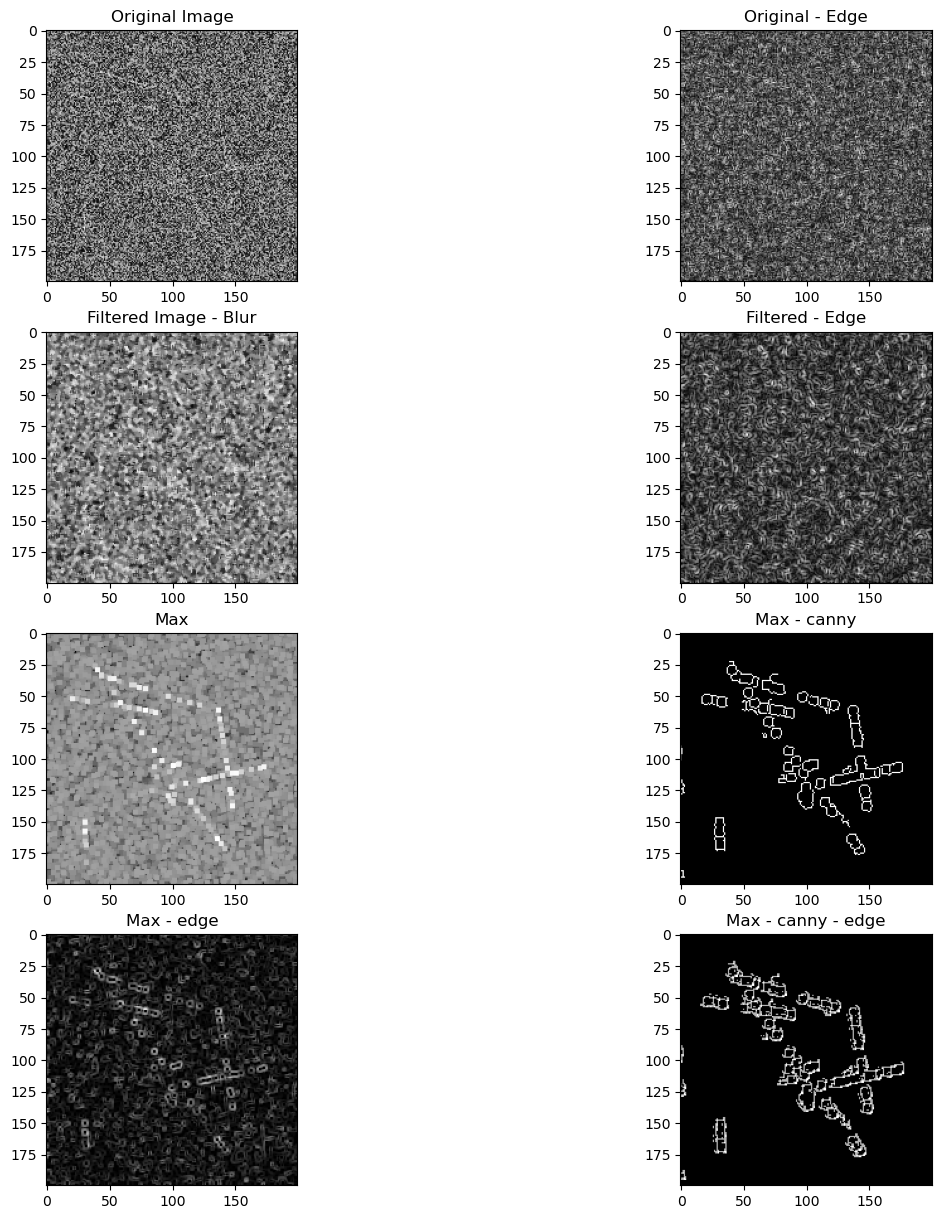

In [149]:
from scipy.ndimage import maximum_filter

img, label = make_data(has_spaceship=True, noise_level = 0.8)
filtered_img = cv2.medianBlur(img.astype(np.float32), 3)
og_edge = apply_prewitt_filter(img)
edges = apply_prewitt_filter(filtered_img)
maxed = maximum_filter(img, size=4)
max_canny = cv2.Canny((maximum_filter(maxed, size=4)*255).astype(np.uint8), low_threshold, high_threshold)

fig, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0][0].set_title('Original Image')
ax[0][0].imshow(img, cmap='gray')

ax[0][1].set_title('Original - Edge')
ax[0][1].imshow(og_edge, cmap='gray')

ax[1][0].set_title('Filtered Image - Blur')
ax[1][0].imshow(filtered_img, cmap='gray')

ax[1][1].set_title('Filtered - Edge')
ax[1][1].imshow(edges, cmap='gray')

ax[2][0].set_title('Max')
ax[2][0].imshow(maxed, cmap='gray')

ax[2][1].imshow(max_canny, cmap='gray')
ax[2][1].set_title('Max - canny')

ax[3][0].imshow(apply_prewitt_filter(maxed), cmap='gray')
ax[3][0].set_title('Max - edge')

ax[3][1].imshow(apply_prewitt_filter(max_canny), cmap='gray')
ax[3][1].set_title('Max - canny - edge')

plt.show()



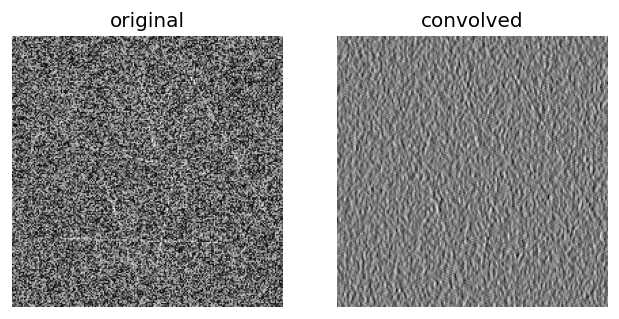

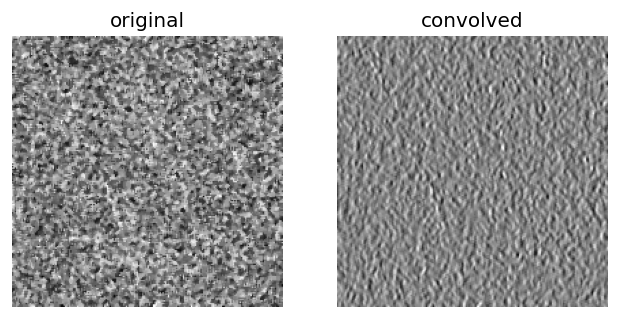

In [100]:
img, label = make_data(has_spaceship=True, noise_level= 0.8)
convolve(img,prewitt_horizontal)
convolve(cv2.medianBlur(img.astype(np.float32) , 3),prewitt_horizontal)

In [162]:
from tqdm import tqdm
from time import sleep

In [167]:
from tqdm import tqdm
import time

# Example loop with tqdm progress bar
total_iterations = 100

# Create a tqdm progress bar
with tqdm(total=total_iterations) as pbar:
    for i in range(total_iterations):
        # Simulate some work
        time.sleep(0.1)
        
        # Update the progress bar
        pbar.update(1)
        
        # Print additional information without interfering with tqdm
        if i % 10 == 0:
            tqdm.write(f'Iteration {i} complete.')

print("Completed all iterations.")


  3%|██▍                                                                               | 3/100 [00:00<00:09,  9.86it/s]

Iteration 0 complete.


 12%|█████████▋                                                                       | 12/100 [00:01<00:08,  9.85it/s]

Iteration 10 complete.


 23%|██████████████████▋                                                              | 23/100 [00:02<00:07,  9.88it/s]

Iteration 20 complete.


 33%|██████████████████████████▋                                                      | 33/100 [00:03<00:06,  9.86it/s]

Iteration 30 complete.


 42%|██████████████████████████████████                                               | 42/100 [00:04<00:05,  9.85it/s]

Iteration 40 complete.


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:05<00:05,  9.69it/s]


Iteration 50 complete.


KeyboardInterrupt: 

In [166]:
for i in tqdm(range(1000)):
    tqdm.write(f'u r on run {i}')
    sleep(0.1)

  0%|▏                                                                                | 2/1000 [00:00<01:41,  9.79it/s]

u r on run 0
u r on run 1


  0%|▎                                                                                | 4/1000 [00:00<01:42,  9.73it/s]

u r on run 2
u r on run 3


  0%|▍                                                                                | 5/1000 [00:00<01:42,  9.73it/s]

u r on run 4
u r on run 5


  1%|▌                                                                                | 7/1000 [00:00<01:42,  9.73it/s]

u r on run 6
u r on run 7


  1%|▋                                                                                | 9/1000 [00:00<01:41,  9.75it/s]

u r on run 8
u r on run 9


  1%|▉                                                                               | 11/1000 [00:01<01:41,  9.75it/s]

u r on run 10
u r on run 11


  1%|█                                                                               | 13/1000 [00:01<01:41,  9.76it/s]

u r on run 12
u r on run 13


  2%|█▎                                                                              | 16/1000 [00:01<01:41,  9.74it/s]

u r on run 14
u r on run 15


  2%|█▍                                                                              | 18/1000 [00:01<01:40,  9.74it/s]

u r on run 16
u r on run 17


  2%|█▌                                                                              | 20/1000 [00:02<01:40,  9.74it/s]

u r on run 18
u r on run 19


  2%|█▊                                                                              | 22/1000 [00:02<01:40,  9.74it/s]

u r on run 20
u r on run 21


  2%|█▊                                                                              | 23/1000 [00:02<01:40,  9.74it/s]

u r on run 22
u r on run 23


  2%|██                                                                              | 25/1000 [00:02<01:39,  9.76it/s]

u r on run 24
u r on run 25


  3%|██▏                                                                             | 27/1000 [00:02<01:39,  9.76it/s]

u r on run 26
u r on run 27


  3%|██▎                                                                             | 29/1000 [00:02<01:39,  9.77it/s]

u r on run 28
u r on run 29


  3%|██▌                                                                             | 32/1000 [00:03<01:39,  9.78it/s]

u r on run 30
u r on run 31


  3%|██▋                                                                             | 34/1000 [00:03<01:38,  9.76it/s]

u r on run 32
u r on run 33


  4%|██▉                                                                             | 36/1000 [00:03<01:38,  9.76it/s]

u r on run 34
u r on run 35


  4%|███                                                                             | 38/1000 [00:03<01:38,  9.75it/s]

u r on run 36
u r on run 37


  4%|███                                                                             | 39/1000 [00:04<01:38,  9.75it/s]

u r on run 38
u r on run 39


  4%|███▎                                                                            | 41/1000 [00:04<01:38,  9.75it/s]

u r on run 40
u r on run 41


  4%|███▍                                                                            | 43/1000 [00:04<01:38,  9.75it/s]

u r on run 42
u r on run 43


  4%|███▌                                                                            | 45/1000 [00:04<01:38,  9.74it/s]

u r on run 44
u r on run 45


  5%|███▊                                                                            | 48/1000 [00:04<01:37,  9.75it/s]

u r on run 46
u r on run 47


  5%|████                                                                            | 50/1000 [00:05<01:37,  9.75it/s]

u r on run 48
u r on run 49


  5%|████▏                                                                           | 52/1000 [00:05<01:37,  9.76it/s]

u r on run 50
u r on run 51


  5%|████▎                                                                           | 54/1000 [00:05<01:36,  9.77it/s]

u r on run 52
u r on run 53


  6%|████▍                                                                           | 55/1000 [00:05<01:36,  9.76it/s]

u r on run 54
u r on run 55


  6%|████▌                                                                           | 57/1000 [00:05<01:36,  9.76it/s]

u r on run 56
u r on run 57


  6%|████▋                                                                           | 59/1000 [00:06<01:36,  9.76it/s]

u r on run 58
u r on run 59


  6%|████▉                                                                           | 61/1000 [00:06<01:36,  9.75it/s]

u r on run 60
u r on run 61


  6%|█████                                                                           | 64/1000 [00:06<01:35,  9.76it/s]

u r on run 62
u r on run 63


  7%|█████▎                                                                          | 66/1000 [00:06<01:35,  9.75it/s]

u r on run 64
u r on run 65


  7%|█████▎                                                                          | 66/1000 [00:06<01:37,  9.61it/s]

u r on run 66


KeyboardInterrupt: 